In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [27]:
import pandas as pd
df = pd.read_csv('Iris_external (1).csv')
df.sample(10) # it gives the 10 rows chosen randomly

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
61,5.9,3.0,4.2,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
123,6.3,2.7,4.9,1.8,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [14]:
df.info()
# Here below for all 5 columns it showns that there are no null values .i.e no record is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [15]:
df.isna().sum()
# This code also check for any missing or null values and gives the sum of null records.

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Class_num'] = le.fit_transform(df['Class'])

#df['Class'].replace(['Iris-versicolor', 'Iris-virginica ','Iris-setosa'],[0,1,2], inplace=True)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [42]:
df.corr()
#No correlation is between -0.1 and 0.1

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class_num
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class_num,0.782561,-0.419446,0.949043,0.956464,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [45]:
df.var()
# All Variance values are > 0.1

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class_num               0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

C:\Users\Rohit Agarwal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rohit Agarwal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


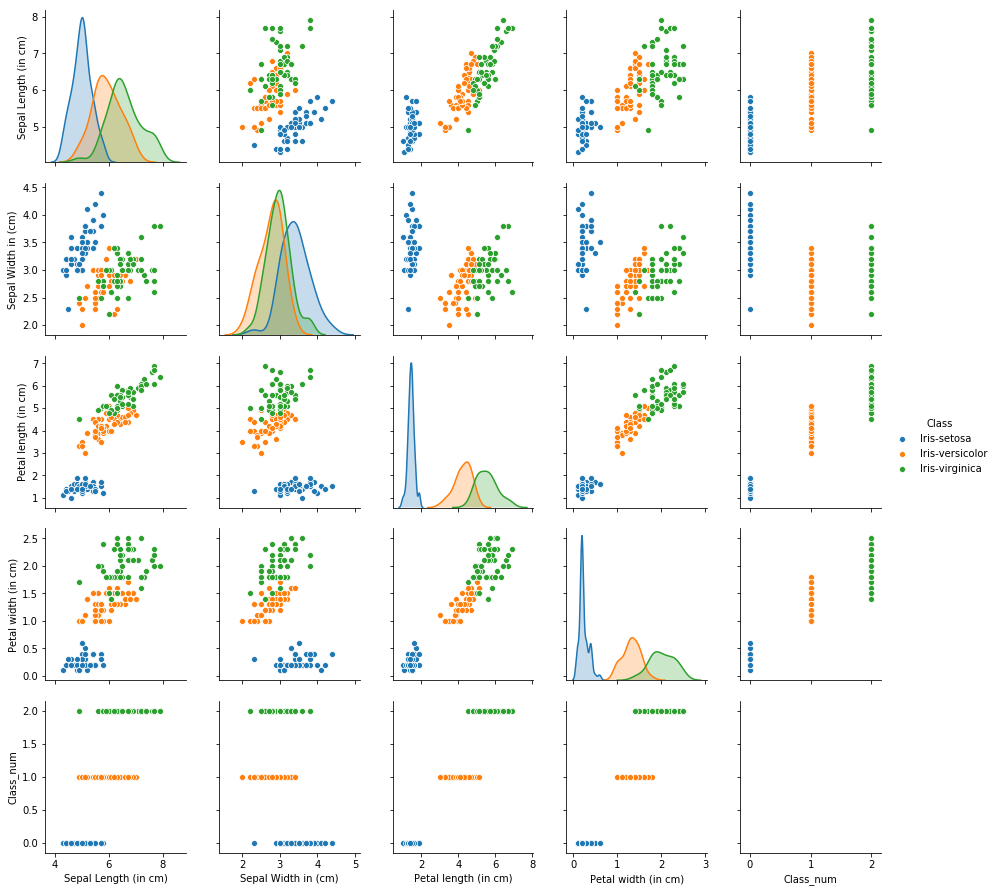

In [47]:
import seaborn as sns
sns.pairplot(df, hue = 'Class')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [56]:
x = df.drop(columns = ['Class','Class_num'])
y = df['Class']

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [66]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(30,)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Stdscal = StandardScaler()


In [150]:
#We scaled training data and used the same object to scale test data. We dont scale the test data using new learning insted use same learning derived from training dataset
ScaledX_train = Stdscal.fit_transform(x_train)
ScaledX_test = Stdscal.transform(x_test)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(ScaledX_train,y_train)
train_pred = knn.predict(ScaledX_train)
print(accuracy_score(y_train,train_pred))
train_pred = knn.predict(ScaledX_test)
print(knn.score(ScaledX_test,y_test))

0.95
1.0


In [86]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(ScaledX_train,y_train)
#print(knn.score(ScaledX_train,y_train))
#print(knn.score(ScaledX_test,y_test))
train_pred = knn.predict(ScaledX_train)
print(accuracy_score(y_train,train_pred))
train_pred = knn.predict(ScaledX_test)
print(knn.score(ScaledX_test,y_test))

0.9583333333333334
0.9666666666666667


In [88]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(ScaledX_train,y_train)
#print(knn.score(ScaledX_train,y_train))
#print(knn.score(ScaledX_test,y_test))
train_pred = knn.predict(ScaledX_train)
print(accuracy_score(y_train,train_pred))
train_pred = knn.predict(ScaledX_test)
print(knn.score(ScaledX_test,y_test))

0.95
1.0


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

In [118]:
res_train = []
res_test = []
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(ScaledX_train,y_train)
    train_pred = knn.predict(ScaledX_train)
    test_pred = knn.predict(ScaledX_test)
    res_train.append(1-(accuracy_score(y_train,train_pred)))
    res_test.append(1-(accuracy_score(y_test,test_pred)))

In [129]:
res_train_df = pd.DataFrame(res_train, index=range(1,20,2))
res_test_df = pd.DataFrame(res_test, index=range(1,20,2))

In [153]:

res_train_df


,0
1,0.000000
3,0.050000
5,0.041667
7,0.033333
9,0.050000
11,0.058333
13,0.050000
15,0.050000
17,0.050000
19,0.058333


In [154]:

res_test_df

,0
1,0.000000
3,0.000000
5,0.033333
7,0.033333
9,0.000000
11,0.000000
13,0.033333
15,0.033333
17,0.066667
19,0.066667


In [155]:
res_train_df.idxmin()
# using idxmin function finding the value of k =1 with lowest MSE

0    1
dtype: int64

In [157]:
res_test_df.idxmin()
# using idxmin function finding the value of k =1 with lowest MSE

0    1
dtype: int64

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

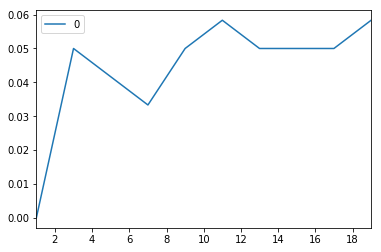

In [151]:
res_train_df.plot()

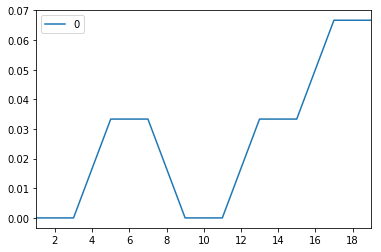

In [152]:
res_test_df.plot()